# Google Search Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

case 1:
First, write a code where, by changing just the keyword, we can search for multiple things. 

# Setup pytrend library and keyword define

In [2]:
# Initializing the pytrends request object to access google trends data
pytrends = TrendReq(hl = 'en-US', tz=360)
keyword = "Cloud Computing"


# Data Request

In [63]:
pytrends.build_payload([keyword], cat = 0, timeframe= 'today 12-m', geo='', gprop='')

case 2 :
Top 15 countries where the keywords are searched the most, and also create visual representation of it.

# Country wise interest

In [64]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by= keyword,ascending= False).head(15)

C:\Users\RUDRA BARMAN\AppData\Local\Temp\ipykernel_7032\3038052226.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




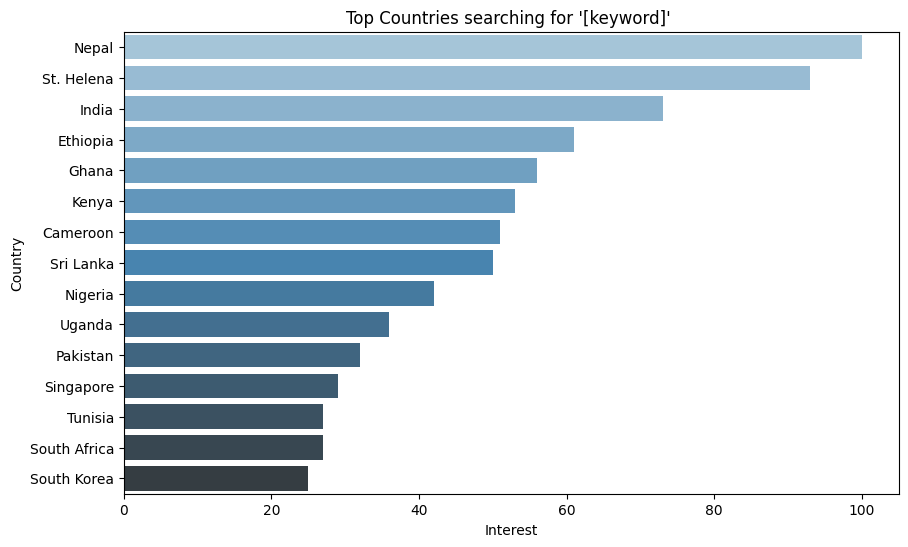

In [65]:
plt.figure(figsize=(10,6))
sns.barplot(x = region_data[keyword], y= region_data.index, palette= 'Blues_d')
plt.title(f"Top Countries searching for '[keyword]' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

case 3 :
A world map needs to be plotted showing the countries that search the keyword the most.

# World map

In [66]:
# Avoid ValueError when resetting index multiple times or when a 'level_0' column already exists
if 'level_0' in region_data.columns:
    region_data = region_data.drop(columns=['level_0'])
# If the index has a name (e.g., geoName) or we don't already have a 'geoName' column, reset it
if region_data.index.name is not None or 'geoName' not in region_data.columns:
        region_data = region_data.reset_index()


In [67]:
# Showing google search interest by country or region on a world map
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')
fig.show()

C:\Users\RUDRA BARMAN\AppData\Local\Temp\ipykernel_7032\4207058804.py:3: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



case 4 :
We need to extract the time-wise interest of the keyword - how it trended in different years.

# time wise interest

In [70]:
time_df = pytrends.interest_over_time()
# fetching time-wise search interest data for the selected keyword from google trends 

c:\Users\RUDRA BARMAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



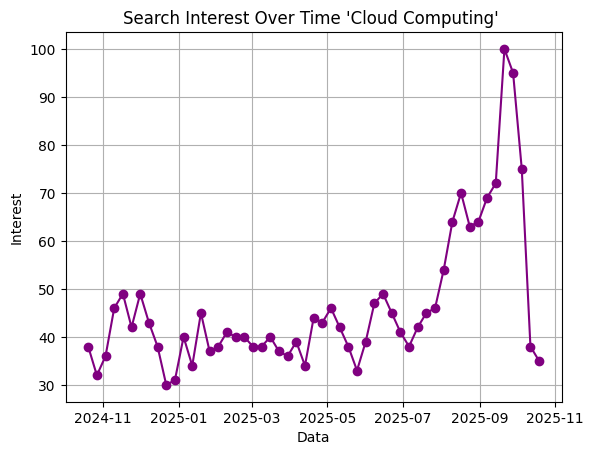

In [71]:
# Plotting the search interest trend for a single keyword over time 
plt.Figure(figsize=(16,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color= 'purple')
plt.title(f"Search Interest Over Time '{keyword}' ")
plt.xlabel('Data')
plt.ylabel("Interest")
plt.grid(True)
plt.show()

case 5 :
Compare related keywords and plot the graph.

# Multiple keywords compare

In [72]:
kw_list = ["Cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat= 0, timeframe= 'today 12-m', geo= '', gprop= '')
# Creating a payload for google trends with the selected keywords, category, time range (past 12 months), and global region

c:\Users\RUDRA BARMAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



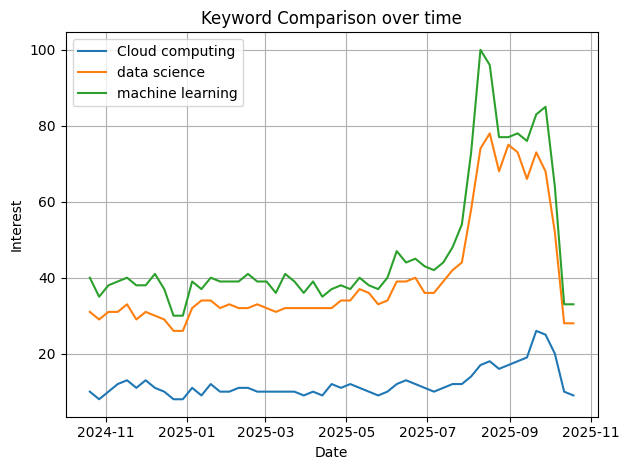

In [73]:
compare_df = pytrends.interest_over_time()
# Fetching the Google Trends data showing interest of the selected keywors over time
plt.Figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("Keyword Comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
# End 